In [1]:
%matplotlib inline

In [2]:
from IPython.display import display
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import glob
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.5, rc={'figure.figsize':(14, 8)})

# This is just to make TensorFlow use only one of my GPUs.
os.environ["CUDA_VISIBLE_DEVICES"]="0"

/home/dustin/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data = pd.read_csv('/home/dustin/Data/Datasets/creditcardfraud/creditcard.csv')
display(data.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
LABELS = ['Non-Fraud', 'Fraud']

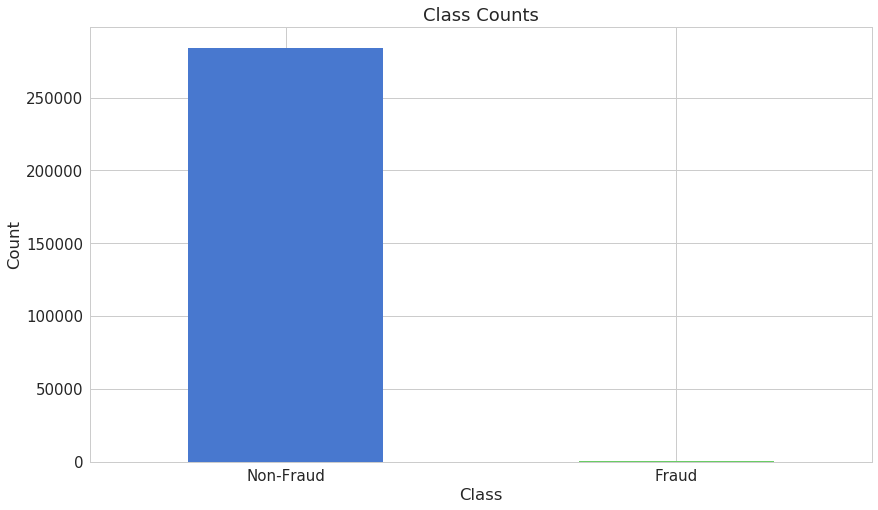

In [7]:
ax = data['Class'].value_counts().plot(kind='bar', rot=0)
ax.set_title('Class Counts');
ax.set_ylabel('Count');
ax.set_xlabel('Class');
ax.set_xticklabels(LABELS);

In [8]:
non_frauds = data.loc[data['Class'] == 0]
frauds = data.loc[data['Class'] == 1]

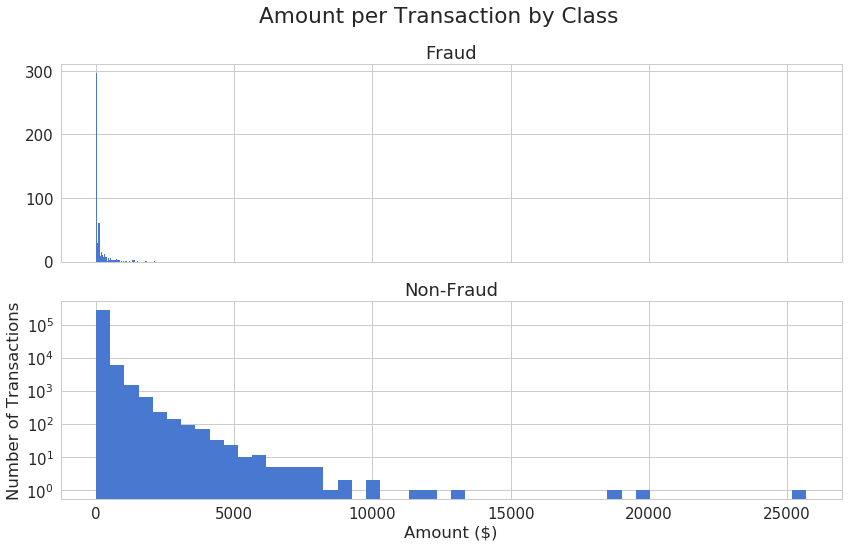

In [9]:
# Compare the distribution of amount by class.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Amount per Transaction by Class')

bins = 50

ax1.hist(frauds['Amount'], bins=bins);
ax1.set_title('Fraud');

ax2.hist(non_frauds['Amount'], bins=bins);
ax2.set_title('Non-Fraud');
ax2.set_xlabel('Amount ($)');
ax2.set_ylabel('Number of Transactions');
ax2.set_yscale('log')

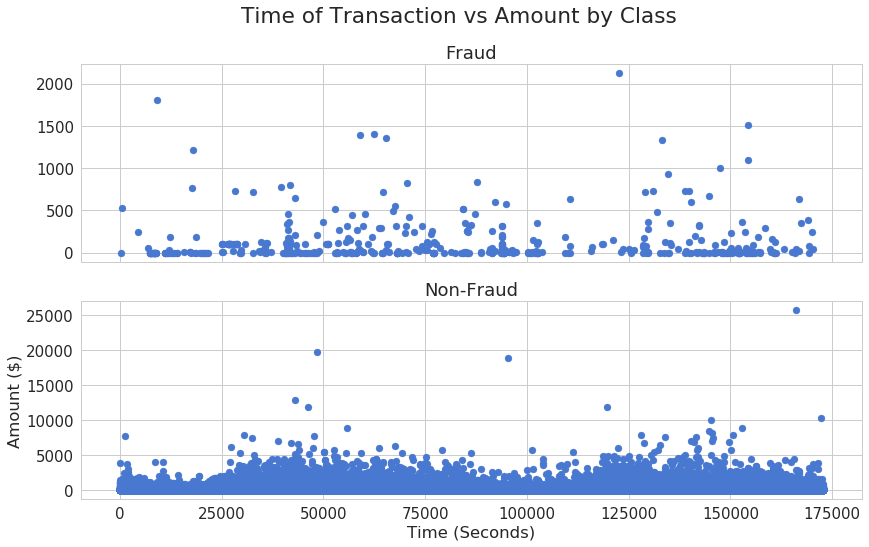

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of Transaction vs Amount by Class');

ax1.scatter(frauds['Time'], frauds['Amount']);
ax1.set_title('Fraud');

ax2.scatter(non_frauds['Time'], non_frauds['Amount']);
ax2.set_title('Non-Fraud');
ax2.set_xlabel('Time (Seconds)');
ax2.set_ylabel('Amount ($)');

In [11]:
data = data.drop(columns=['Time'])
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [12]:
train_features, test_features = train_test_split(data, test_size=0.2)
train_features = train_features[train_features['Class'] == 0]
train_features = train_features.drop(columns=['Class'])

test_labels = test_features['Class']
test_features = test_features.drop(columns=['Class'])

display(train_features.shape)
display(test_features.shape)

(227452, 29)

(56962, 29)

## TensorFlow

In [13]:
def get_feature_columns(features):
    # These are all numeric value columns so this is easy.
    return [tf.feature_column.numeric_column(key=c) for c in features.columns]

def create_autoencoder_model(features, labels, mode, params):
    input_layer = tf.feature_column.input_layer(features, params['feature_columns'])
    
    hidden_layer = input_layer
    for layer_index, layer_size in enumerate(params['hidden_layers']):
        hidden_layer = tf.layers.dense(hidden_layer, 
                                       units=layer_size, 
                                       activation=params['activation_function'], 
                                       name='Hidden{0}'.format(layer_index))
    
    output_layer = tf.layers.dense(hidden_layer, units=len(features), name='OutputLayer')
    
    # If predict, there is nothing else to add to the graph.
    if mode == tf.estimator.ModeKeys.PREDICT:
        estimator_spec = tf.estimator.EstimatorSpec(mode, predictions=output_layer)
    # If eval or train there are some more pieces to add to the graph.    
    else:
        loss = tf.losses.mean_squared_error(labels=input_layer, predictions=output_layer, reduction=tf.losses.Reduction.MEAN)
        
        if mode == tf.estimator.ModeKeys.EVAL:
            estimator_spec = tf.estimator.EstimatorSpec(mode, loss=loss, eval_metric_ops=None)
        else:
            optimizer = tf.train.AdamOptimizer(learning_rate=params['learning_rate'])
            train_op = optimizer.minimize(loss, global_step=tf.train.get_global_step())
            estimator_spec = tf.estimator.EstimatorSpec(mode, loss=loss, train_op=train_op)
        
    return estimator_spec

In [14]:
%%time

tf.logging.set_verbosity('WARN')
input_fn = tf.estimator.inputs.pandas_input_fn(x=train_features, y=None, num_epochs=100, batch_size=32, shuffle=True)
feature_columns = get_feature_columns(train_features)
hidden_layers = [14, 7, 14]

learning_rates = [0.01, 0.001, 0.0001]
activation_functions = [tf.nn.tanh, tf.nn.relu]

run_number = 0
for learning_rate in learning_rates:
    for activation_function in activation_functions:
        run_name = 'run_{0}'.format(run_number)
        print('{0}: learning_rate {1}, activation_function{2}'.format(run_name, learning_rate, activation_function))
        
        
        filelist = glob.glob('./model/{0}/*'.format(run_name))
        for file in filelist:
            os.remove(file)
        
        autoencoder = tf.estimator.Estimator(model_fn=create_autoencoder_model,
                                             model_dir='./model/{0}'.format(run_name),
                                             params={'feature_columns': feature_columns,
                                                     'hidden_layers': hidden_layers,
                                                     'activation_function': activation_function,
                                                     'learning_rate': learning_rate})
        
        autoencoder.train(input_fn=input_fn);
        
        run_number = run_number + 1

run_0: learning_rate 0.01, activation_function<function tanh at 0x7f3062ec5488>
run_1: learning_rate 0.01, activation_function<function relu at 0x7f3062f58048>
run_2: learning_rate 0.001, activation_function<function tanh at 0x7f3062ec5488>
run_3: learning_rate 0.001, activation_function<function relu at 0x7f3062f58048>
run_4: learning_rate 0.0001, activation_function<function tanh at 0x7f3062ec5488>
run_5: learning_rate 0.0001, activation_function<function relu at 0x7f3062f58048>
CPU times: user 3h 58min 49s, sys: 9min, total: 4h 7min 49s
Wall time: 2h 26min 44s


In [15]:
%%time

tf.logging.set_verbosity('WARN')
input_fn = tf.estimator.inputs.pandas_input_fn(x=train_features, y=None, num_epochs=100, batch_size=32, shuffle=True)
feature_columns = get_feature_columns(train_features)
hidden_layers = [14, 7, 14]
activation_function = tf.nn.relu
learning_rate = 0.001
run_name = 'relu001'

filelist = glob.glob('./model/{0}/*'.format(run_name))
for file in filelist:
    os.remove(file)
    
autoencoder = tf.estimator.Estimator(model_fn=create_autoencoder_model,
                                 model_dir='./model/{0}'.format(run_name),
                                 params={'feature_columns': feature_columns,
                                         'hidden_layers': hidden_layers,
                                         'activation_function': activation_function,
                                         'learning_rate': learning_rate})
        
autoencoder.train(input_fn=input_fn);

CPU times: user 40min 6s, sys: 1min 31s, total: 41min 38s
Wall time: 24min 49s


In [16]:
input_fn = tf.estimator.inputs.pandas_input_fn(x=test_features, y=None, batch_size=1000000, shuffle=False)
predictions = np.array(list(autoencoder.predict(input_fn=input_fn)))

In [17]:
predictions.shape

(56962, 29)

In [18]:
errors = np.mean(np.power(test_features.values - predictions, 2), axis=1)
results = pd.DataFrame({'error': errors, 'class': test_labels})
results.describe()

,class,error
count,56962.000000,56962.000000
mean,0.001738,1.946335
std,0.041653,6.585732
min,0.000000,0.280935
25%,0.000000,0.747442
50%,0.000000,1.094420
75%,0.000000,1.731408
max,1.000000,395.420250


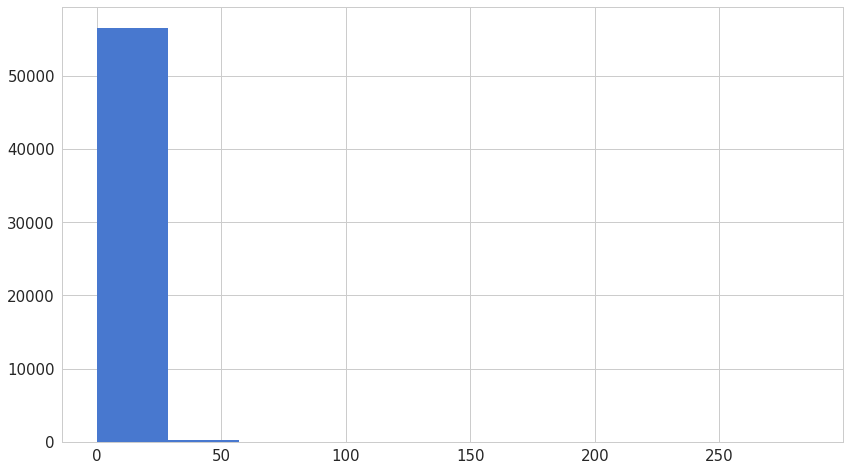

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
non_frauds = results.loc[(results['class'] == 0) & (results['error'] < 300)]
ax.hist(non_frauds['error'].values, bins=10);

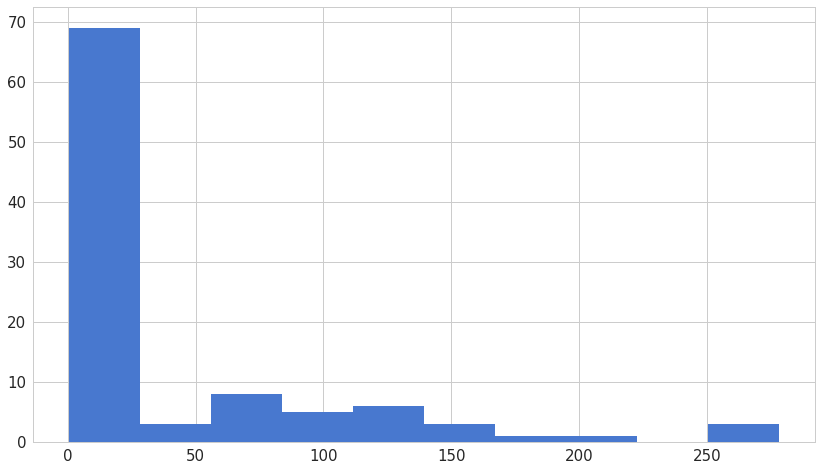

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
frauds = results.loc[results['class'] == 1]
ax.hist(frauds['error'].values, bins=10);